# Classification model evaluation metrics

1. Accuracy
2. Area under ROC(Receiver Operator Characteristics) Curve
3. Confusion Matrix
4. Classification report

** Accuracy **

In [2]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart_disease.csv')

## have your data in x and y

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

## split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## import your model so as to be able to fit the necessary data
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
single_score = clf.score(X_test, y_test)


## for cross validation, import cross_val_score
np.random.seed(0)
from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(clf, X, y, cv=5)

## find the average of your cross_val score
import numpy as np

cross_val_avg = np.mean(cross_val_score)
cross_val_avg

0.8248087431693989

##  **Accuracy** 

** This model is going to 8 in 10 times accurately predict or model a similar featured variables as the one 
used in building this model ** 

In [72]:
##
print(f'Heart Disease Classifier Cross-validated Accuracy: {cross_val_avg * 100:.2f}% ')

Heart Disease Classifier Cross-validated Accuracy: 82.48% 


In [14]:
## comparing the single and cross-validated score

single_score, cross_val_avg

(0.7704918032786885, 0.8248087431693989)

# Lets do a Receiver Operator Characteristics and Area Under Curve to know how close our predicted_proba_positive and the actual y_test are.

**2. Area Under ROC Curve **

In [29]:
predicted_proba = clf.predict_proba(X_test)
## our ones will be positive, slice for only ones from the list
predicted_proba_positive = predicted_proba[:, 1]
predicted_proba_positive

array([0.89, 0.79, 0.16, 0.61, 0.13, 0.5 , 0.04, 0.93, 0.74, 0.96, 0.28,
       0.32, 0.01, 0.1 , 0.23, 0.  , 0.04, 0.47, 0.27, 0.74, 0.95, 0.86,
       0.64, 0.15, 0.99, 0.13, 0.01, 0.02, 0.3 , 0.67, 0.51, 1.  , 0.88,
       0.21, 0.29, 0.25, 0.24, 0.02, 0.55, 0.49, 0.46, 0.15, 0.78, 0.32,
       0.64, 0.97, 0.78, 0.87, 0.07, 0.83, 0.05, 0.1 , 0.59, 0.85, 0.86,
       0.34, 0.75, 0.39, 0.95, 0.99, 0.39])

In [38]:
## tpr(true positive rate) and fpr(false positive rate)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba_positive)
fpr

array([0.        , 0.        , 0.03225806, 0.03225806, 0.03225806,
       0.03225806, 0.03225806, 0.03225806, 0.06451613, 0.06451613,
       0.12903226, 0.12903226, 0.16129032, 0.16129032, 0.19354839,
       0.19354839, 0.22580645, 0.22580645, 0.29032258, 0.32258065,
       0.35483871, 0.41935484, 0.41935484, 0.4516129 , 0.4516129 ,
       0.61290323, 0.64516129, 0.70967742, 0.74193548, 0.77419355,
       0.77419355, 0.96774194, 1.        ])

In [39]:
tpr

array([0.        , 0.03333333, 0.06666667, 0.13333333, 0.2       ,
       0.33333333, 0.4       , 0.5       , 0.53333333, 0.56666667,
       0.56666667, 0.6       , 0.63333333, 0.7       , 0.7       ,
       0.73333333, 0.73333333, 0.76666667, 0.76666667, 0.8       ,
       0.8       , 0.8       , 0.86666667, 0.86666667, 0.9       ,
       0.9       , 0.93333333, 0.93333333, 0.96666667, 0.96666667,
       1.        , 1.        , 1.        ])

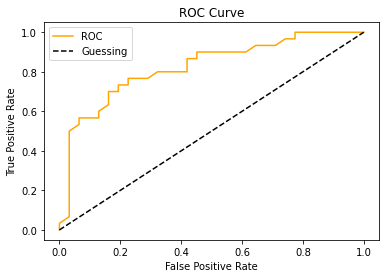

In [150]:
## to visualize this difference, we will plot the fpr against the tpr

import matplotlib.pyplot as plt

def roc_curve_diff(fpr, tpr):
    '''
    This is a diagram showcasing the ROC Curve
    
    '''
    plt.plot(fpr, tpr, label='ROC', color='orange')
    plt.plot([0,1], [0,1], linestyle='--', label='Guessing', color='black')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best') ## is the same as not inserting anything
    plt.show();
    
roc_curve_diff(fpr, tpr)

## Using Area Under ROC curve as an evaluation metric, this model will achieve 82 per cent effectiveness based on the difference between the true test and pred_proba_positive. In other words, this gives the diff between the fpr and tpr.

** Area under ROC curve**

In [50]:
## to find the difference in percentage, lets calculate roc_auc_score
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, predicted_proba_positive)
area_under_curve

0.8236559139784947

In [74]:
print(f'Area Under ROC curve: {area_under_curve * 100:.2f}%')

Area Under ROC curve: 82.37%


In [154]:
##3. Confusion Matrix

In [5]:
## import confusion_matrix metric
from sklearn.metrics import confusion_matrix
np.random.seed(0)
y_preds = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix

array([[20,  9],
       [ 3, 29]], dtype=int64)

In [6]:
pd.crosstab(y_test, y_preds, rownames=['Actual Values'], colnames=['Predicted Values'])

Predicted Values,0,1
Actual Values,,
0,20,9
1,3,29


## To know the version of your sklearn

In [166]:
import sklearn
sklearn.__version__

'1.0.2'

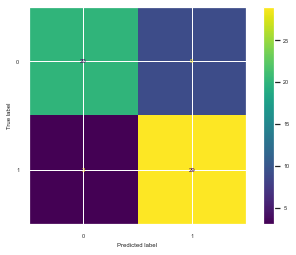

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X=X_test, y=y_test)

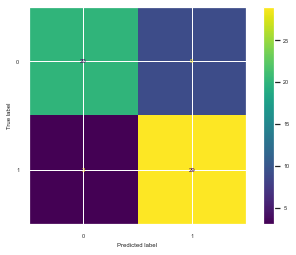

In [8]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

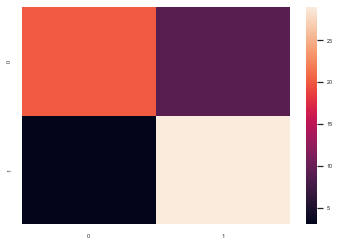

In [9]:
import seaborn as sns
sns.set(font_scale=0.5)
sns.heatmap(conf_matrix);